Perform Hierarchical Drift-Diffusion Modeling of the StateSwitch Dynamic Responses using the HDDM toolbox

Note that for some reason, the saving of models only works when running the script in Python 2.
The following commands can be used to switch between the two python installations in the terminal.

source activate py27
source activate py36

It should also be possible to switch between kernels in Jupyter Notebook.

In [7]:
import hddm
print("HDDM version: "+ hddm.__version__)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: "+ np.__version__) # version <=1.11 necessary for pymc2 (https://groups.google.com/forum/#!topic/hddm-users/Jdwm_IoJk5U)

import scipy.io as io

import warnings
warnings.filterwarnings('ignore')
print("Important: Warnings disabled for improved clarity")


HDDM version: 0.6.0
Numpy version: 1.14.5
Important: Warnings disabled for improved clarity


/Users/kosciessa/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


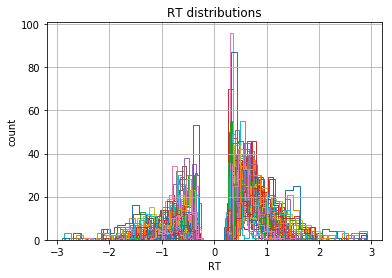

In [8]:
# get data from numpy structured array

dataPath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/';
csvData = dataPath+'StateSwitchDynamicTrialData_MRI.dat';

savePath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/'

########################
## Load and flip data ##
########################

data = hddm.load_csv(csvData)
data.rename(columns={'acc':'response'}, inplace=True)
data.rename(columns={'subject':'subj_idx'}, inplace=True)

dataFlipped = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=40, histtype='step', ax=ax)


In [31]:
##############################################
## Fit hierarchical model across conditions ##
##############################################

# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data)
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m will be saved at: '+savePath+'Model_m')
m.save(savePath+'Model_m')

 [-----------------100%-----------------] 7001 of 7000 complete in 1822.9 secModel m will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/Model_m


In [32]:
#m.plot_posteriors(['a', 't', 'v', 'a_std'])

In [33]:
#data.head(10)

In [34]:
m_stim = hddm.HDDM(data, depends_on={'v': 'dim'})
m_stim.find_starting_values()
m_stim.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim will be saved at: '+ savePath+'Model_m_stim')
m_stim.save(savePath+'Model_m_stim')

 [-----------------100%-----------------] 7001 of 7000 complete in 3228.2 secModel m_stim will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/Model_m_stim


In [35]:
#m_stim.plot_posteriors(['a', 't', 'v', 'a_std'])

Text(0.5,1,'Posterior of drift-rate group means')

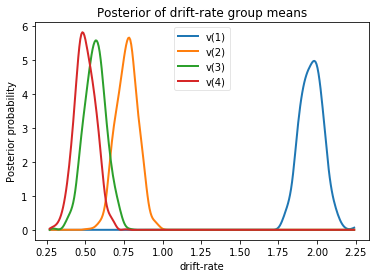

In [36]:
# drift rate v
v_1,v_2,v_3,v_4 = m_stim.nodes_db.node[['v(1)', 'v(2)', 'v(3)','v(4)']]
hddm.analyze.plot_posterior_nodes([v_1,v_2,v_3,v_4])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [37]:
print("P(1 >2)=", (v_1.trace() > v_2.trace()).mean())
print("P(2 >3)=",(v_2.trace() > v_3.trace()).mean())
print("P(3 >4)=",(v_3.trace() > v_4.trace()).mean())
print("P(2 >4)=",(v_2.trace() > v_4.trace()).mean())
print()
print("Lumped modelDIC: %f" % m.dic)
print("Stimulus modelDIC: %f" % m_stim.dic)
print()

print("Model with varying drift rates provides better fit to the data.")

('P(1 >2)=', 1.0)
('P(2 >3)=', 0.979)
('P(3 >4)=', 0.7365)
('P(2 >4)=', 0.9955)
()
Lumped modelDIC: 27212.117006
Stimulus modelDIC: 24873.098372
()
Model with varying drift rates provides better fit to the data.


Plotting t


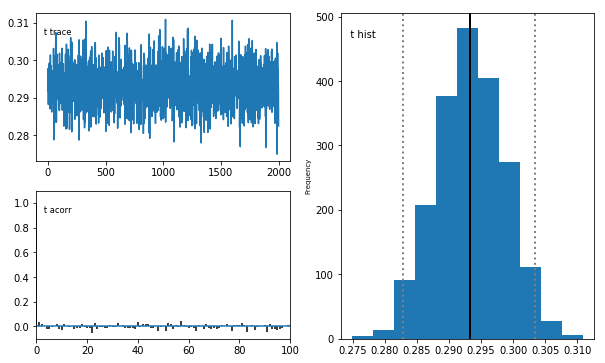

In [38]:
m_stim.plot_posteriors(['t']) # Plot only distribution for non-decision time (fixed)

In [39]:
###############################################
## Fit hierarchical model for each condition ##
###############################################

m_stim_v_a_t = hddm.HDDM(data, depends_on={'v': 'dim', 'a': 'dim', 't': 'dim'})
m_stim_v_a_t.find_starting_values()
m_stim_v_a_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_a_t will be saved at: '+ savePath+'Model_m_stim_v_a_t')
m_stim_v_a_t.save(savePath+'Model_m_stim_v_a_t')

 [-----------------100%-----------------] 7001 of 7000 complete in 4989.0 secModel m_stim_v_a_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/Model_m_stim_v_a_t


Text(0.5,1,'Posterior of drift-rate group means')

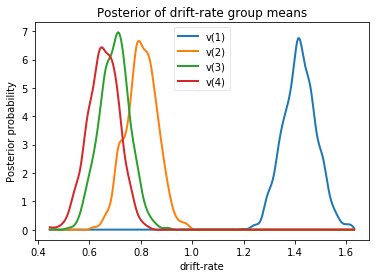

In [40]:
# drift rate v
v_1,v_2,v_3,v_4 = m_stim_v_a_t.nodes_db.node[['v(1)', 'v(2)', 'v(3)','v(4)']]
hddm.analyze.plot_posterior_nodes([v_1,v_2,v_3,v_4])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

Text(0.5,1,'Posterior of threshold group means')

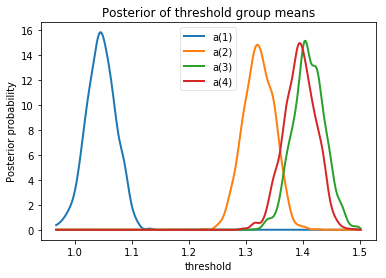

In [41]:
# threshold a
a_1,a_2,a_3,a_4 = m_stim_v_a_t.nodes_db.node[['a(1)', 'a(2)', 'a(3)','a(4)']]
hddm.analyze.plot_posterior_nodes([a_1,a_2,a_3,a_4])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

Text(0.5,1,'Posterior of non-decision time group means')

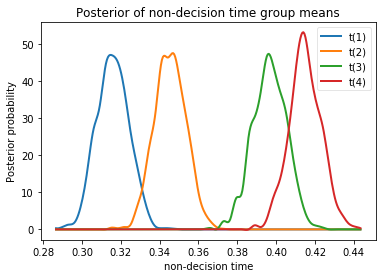

In [42]:
# non-decision time t
t_1,t_2,t_3,t_4 = m_stim_v_a_t.nodes_db.node[['t(1)', 't(2)', 't(3)','t(4)']]
hddm.analyze.plot_posterior_nodes([t_1,t_2,t_3,t_4])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-decision time group means')

In [43]:
print("Lumped model DIC: %f" % m.dic)
print("Stimulus model varying v DIC: %f" % m_stim.dic)
print("Stimulus model varying a t v DIC: %f" % m_stim_v_a_t.dic)

Lumped model DIC: 27212.117006
Stimulus model varying v DIC: 24873.098372
Stimulus model varying a t v DIC: 16405.591160


# Modeling by age

In [44]:
m_stim_v_byAge = hddm.HDDM(data, depends_on={'v': ['dim', 'age']})
m_stim_v_byAge.find_starting_values()
m_stim_v_byAge.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_byAge will be saved at: '+ savePath+'Model_m_stim_v_byAge')
m_stim_v_byAge.save(savePath+'Model_m_stim_v_byAge')

 [-----------------100%-----------------] 7001 of 7000 complete in 3245.2 secModel m_stim_v_byAge will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/Model_m_stim_v_byAge


Text(0.5,1,'OA: Posterior of drift-rate group means')

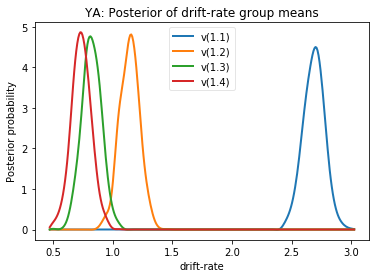

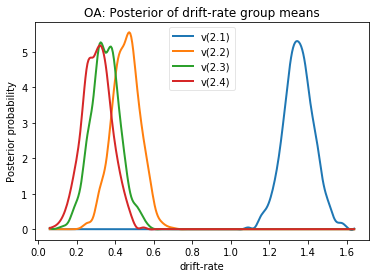

In [45]:
# drift rate v: young adults
v_11,v_12,v_13,v_14 = m_stim_v_byAge.nodes_db.node[['v(1.1)', 'v(1.2)', 'v(1.3)','v(1.4)']]
hddm.analyze.plot_posterior_nodes([v_11,v_12,v_13,v_14])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of drift-rate group means')

# drift rate v: older adults 
v_21,v_22,v_23,v_24 = m_stim_v_byAge.nodes_db.node[['v(2.1)', 'v(2.2)', 'v(2.3)','v(2.4)']]
hddm.analyze.plot_posterior_nodes([v_21,v_22,v_23,v_24])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('OA: Posterior of drift-rate group means')

In [46]:
ppc_data = hddm.utils.post_pred_gen(m_stim_v_byAge)
ppc_data.head(10)

 [-----------------100%-----------------] 391 of 388 complete in 7044.8 sec

rt  response
node        sample                      
wfpt(1.1).1 0      0  0.557245       1.0
                   1  0.926045       1.0
                   2  0.438345       1.0
                   3  0.629745       1.0
                   4  0.479045       1.0
                   5  0.779045       1.0
                   6  0.569445       1.0
                   7  0.380145       1.0
                   8  0.409045       1.0
                   9  0.406245       1.0

In [47]:
m_stim_v_a_t_byAge = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim', 'age'], 't': ['dim', 'age']})
m_stim_v_a_t_byAge.find_starting_values()
m_stim_v_a_t_byAge.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_a_t_byAge will be saved at: '+ savePath+'Model_m_stim_v_a_t_byAge')
m_stim_v_a_t_byAge.save(savePath+'Model_m_stim_v_a_t_byAge')

 [-----------------100%-----------------] 7001 of 7000 complete in 4978.9 secModel m_stim_v_a_t_byAge will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/Model_m_stim_v_a_t_byAge


Text(0.5,1,'OA: Posterior of drift-rate group means')

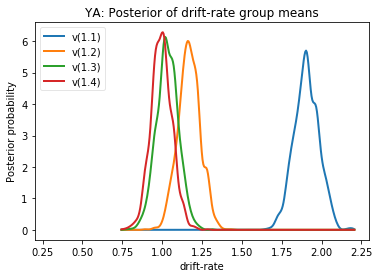

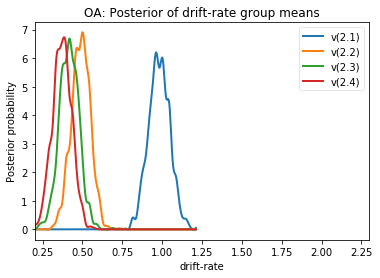

In [48]:
# drift rate v: young adults
v_11,v_12,v_13,v_14 = m_stim_v_a_t_byAge.nodes_db.node[['v(1.1)', 'v(1.2)', 'v(1.3)','v(1.4)']]
hddm.analyze.plot_posterior_nodes([v_11,v_12,v_13,v_14])
plt.xlim(0.2, 2.3)
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of drift-rate group means')

# drift rate v: older adults 
v_21,v_22,v_23,v_24 = m_stim_v_a_t_byAge.nodes_db.node[['v(2.1)', 'v(2.2)', 'v(2.3)','v(2.4)']]
hddm.analyze.plot_posterior_nodes([v_21,v_22,v_23,v_24])
plt.xlim(0.2, 2.3)
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('OA: Posterior of drift-rate group means')

Text(0.5,1,'OA: Posterior of threshold group means')

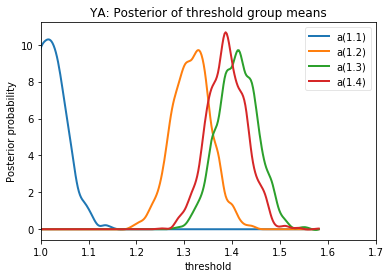

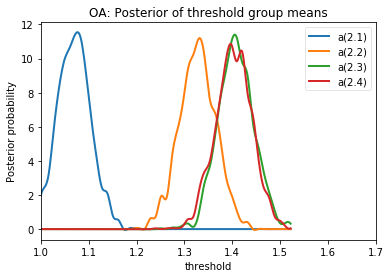

In [49]:
# threshold a: younger adults 
a_11,a_12,a_13,a_14 = m_stim_v_a_t_byAge.nodes_db.node[['a(1.1)', 'a(1.2)', 'a(1.3)','a(1.4)']]
hddm.analyze.plot_posterior_nodes([a_11,a_12,a_13,a_14])
plt.xlim(1.0, 1.7)
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of threshold group means')

# threshold a: older adults 
a_21,a_22,a_23,a_24 = m_stim_v_a_t_byAge.nodes_db.node[['a(2.1)', 'a(2.2)', 'a(2.3)','a(2.4)']]
hddm.analyze.plot_posterior_nodes([a_21,a_22,a_23,a_24])
plt.xlim(1.0, 1.7)
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('OA: Posterior of threshold group means')

Non-decision time appears to be modulated more strongly in the younger adults.
In contrast, OAs are generally slower, but with less apparent modulation.
Note how OAs have lower non-decision time in the Dim4 condition vs. YAs.
Teichert et al., 2016: 'integration onset may be amenable to top-down regulation'
Non-decision times typically range from 200 to 400 ms in different studies.


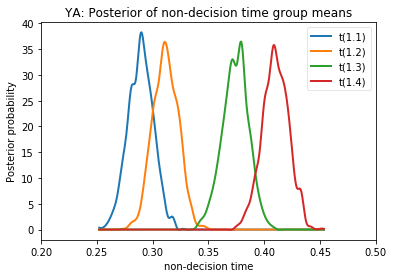

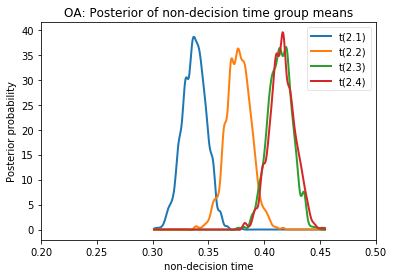

In [50]:
# non-decision time t younger adults 
t_11,t_12,t_13,t_14 = m_stim_v_a_t_byAge.nodes_db.node[['t(1.1)', 't(1.2)', 't(1.3)','t(1.4)']]
hddm.analyze.plot_posterior_nodes([t_11,t_12,t_13,t_14])
plt.xlim(0.2, 0.5)
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of non-decision time group means')

# non-decision time t: older adults 
t_21,t_22,t_23,t_24 = m_stim_v_a_t_byAge.nodes_db.node[['t(2.1)', 't(2.2)', 't(2.3)','t(2.4)']]
hddm.analyze.plot_posterior_nodes([t_21,t_22,t_23,t_24])
plt.xlim(0.2, 0.5)
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('OA: Posterior of non-decision time group means')

print("Non-decision time appears to be modulated more strongly in the younger adults.")
print("In contrast, OAs are generally slower, but with less apparent modulation.")
print("Note how OAs have lower non-decision time in the Dim4 condition vs. YAs.")

print("Teichert et al., 2016: 'integration onset may be amenable to top-down regulation'")
print("Non-decision times typically range from 200 to 400 ms in different studies.")

In [51]:
print("Age-wise stimulus model varying v DIC: %f" % m_stim_v_byAge.dic)
print("Age-wise stimulus model varying a t v DIC: %f" % m_stim_v_a_t_byAge.dic)

Age-wise stimulus model varying v DIC: 24870.400312
Age-wise stimulus model varying a t v DIC: 16386.468933


In [52]:
print("P(1 >2)=", (v_11.trace() > v_12.trace()).mean())
print("P(2 >3)=",(v_12.trace() > v_13.trace()).mean())
print("P(3 >4)=",(v_13.trace() > v_14.trace()).mean())
print("P(2 >4)=",(v_12.trace() > v_14.trace()).mean())

print("P(1 >2)=", (v_21.trace() > v_22.trace()).mean())
print("P(2 >3)=",(v_22.trace() > v_23.trace()).mean())
print("P(3 >4)=",(v_23.trace() > v_24.trace()).mean())
print("P(2 >4)=",(v_22.trace() > v_24.trace()).mean())


('P(1 >2)=', 1.0)
('P(2 >3)=', 0.926)
('P(3 >4)=', 0.6465)
('P(2 >4)=', 0.9525)
('P(1 >2)=', 1.0)
('P(2 >3)=', 0.7915)
('P(3 >4)=', 0.7035)
('P(2 >4)=', 0.9125)


Are there inter-individual correlations between v, t and a?

In [53]:
m_stim_v_a_t_byAge.print_stats()

                       mean         std        2.5q         25q         50q        75q     97.5q       mc err
a(1.1)              1.01799   0.0384166    0.942925    0.992375     1.01806     1.0434   1.09399   0.00104243
a(1.2)              1.31371    0.040598     1.23319     1.28608      1.3141    1.34028   1.39502  0.000998998
a(1.3)              1.40753    0.040943     1.32813     1.37875     1.40761    1.43483    1.4864   0.00111455
a(1.4)              1.38578   0.0405288     1.30655     1.35792     1.38464    1.41287   1.46523   0.00115687
a(2.1)              1.07211   0.0344633     1.00308     1.04887     1.07276    1.09519   1.14235  0.000867256
a(2.2)              1.32569   0.0372425     1.25079     1.30078     1.32576    1.35053   1.39775     0.001095
a(2.3)              1.40461   0.0367397      1.3361     1.38025     1.40323    1.42928    1.4775   0.00100175
a(2.4)              1.40004   0.0373986     1.32662     1.37534     1.40041    1.42504    1.4706  0.000941524
a_std     

In [54]:
# save individual results as CSV

dataMat = m_stim_v_a_t_byAge.get_traces()
fileName = 'Data_m_stim_v_a_t_byAge_header.csv'
print('Data from m_stim_v_a_t_byAge will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

Data from m_stim_v_a_t_byAge will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI/Data_m_stim_v_a_t_byAge_header.csv


Fit different models with only partial inclusion of age as a modulator

In [ ]:
#m_stim_v12_a12_t12 = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim', 'age'], 't': ['dim', 'age']}, p_outlier=.05)
#m_stim_v12_a12_t12.find_starting_values()
#m_stim_v12_a12_t12.sample(7000, burn=5000, dbname='traces.db', db='pickle')
#m_stim_v12_a12_t12.save(savePath+'m_stim_v12_a12_t12')

In [9]:
m_stim_v12_a12_t1 = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim', 'age'], 't': ['dim']}, p_outlier=.05)
m_stim_v12_a12_t1.find_starting_values()
m_stim_v12_a12_t1.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v12_a12_t1.save(savePath+'m_stim_v12_a12_t1')

 [-----------------100%-----------------] 7001 of 7000 complete in 5241.1 sec

In [10]:
m_stim_v12_a1_t1 = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim'], 't': ['dim']}, p_outlier=.05)
m_stim_v12_a1_t1.find_starting_values()
m_stim_v12_a1_t1.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v12_a1_t1.save(savePath+'m_stim_v12_a1_t1')

 [-----------------100%-----------------] 7001 of 7000 complete in 5297.2 sec

In [ ]:
m_stim_v12_a1_t12 = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim'], 't': ['dim', 'age']}, p_outlier=.05)
m_stim_v12_a1_t12.find_starting_values()
m_stim_v12_a1_t12.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v12_a1_t12.save(savePath+'m_stim_v12_a1_t1')

 [-----------------81%-----------       ] 5720 of 7000 complete in 4573.8 sec

In [ ]:
m_stim_v12_a12 = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim', 'age']}, p_outlier=.05)
m_stim_v12_a12.find_starting_values()
m_stim_v12_a12.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v12_a12.save(savePath+'m_stim_v12_a12')

In [ ]:
m_stim_v12_a1 = hddm.HDDM(data, depends_on={'v': ['dim', 'age'], 'a': ['dim']}, p_outlier=.05)
m_stim_v12_a1.find_starting_values()
m_stim_v12_a1.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v12_a1.save(savePath+'m_stim_v12_a1')

In [ ]:
m_stim_v12 = hddm.HDDM(data, depends_on={'v': ['dim', 'age']}, p_outlier=.05)
m_stim_v12.find_starting_values()
m_stim_v12.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v12.save(savePath+'m_stim_v12')

In [ ]:
m_stim_v1 = hddm.HDDM(data, depends_on={'v': ['dim']}, p_outlier=.05)
m_stim_v1.find_starting_values()
m_stim_v1.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v1.save(savePath+'m_stim_v1')

In [ ]:
m_stim_v1_a1_t1 = hddm.HDDM(data, depends_on={'v': ['dim'], 'a': ['dim'], 't': ['dim']}, p_outlier=.05)
m_stim_v1_a1_t1.find_starting_values()
m_stim_v1_a1_t1.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v1_a1_t1.save(savePath+'m_stim_v1_a1_t1')

In [ ]:
m_stim_v2_a2_t2 = hddm.HDDM(data, depends_on={'v': ['age'], 'a': ['age'], 't': ['age']}, p_outlier=.05)
m_stim_v2_a2_t2.find_starting_values()
m_stim_v2_a2_t2.sample(7000, burn=5000, dbname='traces.db', db='pickle')
m_stim_v2_a2_t2.save(savePath+'m_stim_v1_a1_t1')

In [ ]:
print("Age-wise stimulus model varying v DIC: %f" % m_stim_v_byAge.dic)
print("Age-wise stimulus model varying a v DIC: %f" % m_stim_v_a_byAge.dic)
print("Age-wise stimulus model varying a t v DIC: %f" % m_stim_v_a_t_byAge.dic)

print("m_stim_v12_a12_t1 DIC: %f" % m_stim_v12_a12_t1.dic)
print("m_stim_v12_a1_t1 DIC: %f" % m_stim_v12_a1_t1.dic)
print("m_stim_v12_a1_t12 DIC: %f" % m_stim_v12_a1_t12.dic)

print("m_stim_v12_a12 DIC: %f" % m_stim_v12_a12.dic)
print("m_stim_v12_a1 DIC: %f" % m_stim_v12_a1.dic)
print("m_stim_v12 DIC: %f" % m_stim_v12.dic)

print("m_stim_v1 DIC: %f" % m_stim_v1.dic)
print("m_stim_v1_a1_t1 DIC: %f" % m_stim_v1_a1_t1.dic)
print("m_stim_v2_a2_t2 DIC: %f" % m_stim_v2_a2_t2.dic)